# Aufgabe 3

### Imports

In [1]:
import numpy as np
import pandas as pd
from statsmodels.othermod.betareg import BetaModel
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 500)

# a)

### Read data

In [3]:
employment = pd.read_excel("dataset/employment_08_09.xlsx")
print(employment.shape)

(5412, 21)


In [4]:
employment.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### Variable overview

The data set contains mainly discrete variables:
    
- The variable `race` is a categorical nominal-scaled variable wich encodes three distinct states.
- The variable `age` is an integer ratio-scaled variable.
- The rest (exept `earnwke`) are binary (=dummy) variables.

The variable `earnwke` is a continuous variable that is ratio-scaled.

1. The target variable is `employed` / `unemployed`. They should be distinct and exhaustive. Check and leave one out for later analysis.

2. The variable `race` encodes three possible states. Transform to dummies and leave one out for later analysis.

3. The variables `ne_states`, `so_states`, `ce_states` and `we_states` should be distinct and exhaustive. Check and leave one out for later analysis.

4. The variables `private`, `government` and `self` should be distinct and exhaustive. Check and leave one out for later analysis.

5. The variables `educ_lths`, `educ_hs`, `educ_somecol`, `educ_aa`, `educ_ba` and `educ_adv` should be distinct and exhaustive. Check and leave one out for later analysis.

6. The variable `earnwke` is probably not available for self-employed people. Check later and handle possible missing values.

### 1. Sanity check target variables

In [5]:
employment[["employed", "unemployed"]].value_counts()

employed  unemployed
1         0             4738
0         0              435
          1              239
dtype: int64

One can see, that there are 435 data points which contain no information about wether or not the person was employed in 2009.

These points will be removed from the data.

In [6]:
unknown_employment_status = (employment["employed"] == employment["unemployed"])
employment = employment[~unknown_employment_status]
employment.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


Now we remove the redundant variable `employed`:

In [7]:
employment.drop(columns="employed", inplace=True)
employment.head()

,age,race,earnwke,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### 2. Dummy transform `race` column

In [8]:
employment = pd.get_dummies(employment, columns=["race"], drop_first=True)
employment.head()

,age,earnwke,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### 3. Remove redundancy in terms of employment states

Check if every worker contains one and only one employment state:

In [9]:
employment[["ne_states", "so_states", "ce_states", "we_states"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop first state indicator to remove redundancy:

In [10]:
employment.drop(columns="ne_states", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### 4. Remove redundancy in type of employment

Check if every worker contains one and only one employment type:

In [11]:
employment[["government", "private", "self"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop `self` employement indicator to remove redundancy and to reduce maximal amout of correlation between variables (we know when union=1 => self=0):

In [12]:
employment.drop(columns="self", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


### 5. Remove redundancy in worker education

Check if every worker contains one and only one type of highest education level:

In [13]:
employment[["educ_lths", "educ_hs", "educ_somecol", "educ_aa", "educ_bac", "educ_adv"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop first education level to remove redundancy:

In [14]:
employment.drop(columns="educ_lths", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


### 6. Drop `earnwke` variable due to missing values for self-employed workers

In [15]:
employment.drop(columns="earnwke", inplace=True)
employment.head()

,age,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,39,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,41,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,29,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


### Check distribution of target variable

In [16]:
fig = px.histogram(employment, x="unemployed")
fig.show()

One can see that unemployment is pretty undersampled in the training data. One could oversample it by bootstrapping or undersample employed workers by leaving out random data points.

### Define input and target variables

In [17]:
X = employment.drop(columns="unemployed")
y = employment["unemployed"]

### Get train/test split

In [18]:
input_train, input_test, label_train, label_test = train_test_split(X, y, train_size=0.8, shuffle=True, stratify=y, random_state=42)

### Possible methods

We want to predict who is going to be unemployed in the future. The target variable is discrete (more specifically binary) and that's why we are looking at a classification task with two classes.

Possible classification algorithms are:
- k-Nearest-Neighbour
- Decision Tree
- Logistic Regression
- Support Vector Machine

Choosing Logistic Regression, because it is very interesting to compare the L2 loss against the cross entropy loss in terms of classification.

### Baseline: Most often class

In [19]:
most_often_class = label_train.mode()[0]
print(f"The class that appears most often in the training data is: class {most_often_class} (= employed)")

The class that appears most often in the training data is: class 0 (= employed)


In [20]:
model = lambda x: most_often_class
y_hat = input_test.apply(model, axis=1)
print(f"The accuracy of this model is: {accuracy_score(label_test, y_hat):.2%}")

The accuracy of this model is: 95.18%


### Baseline: Linear Regression

In [21]:
model = linear_model.LinearRegression()
model.fit(input_train, label_train)

LinearRegression()

The accuracy of this model is: 95.18%


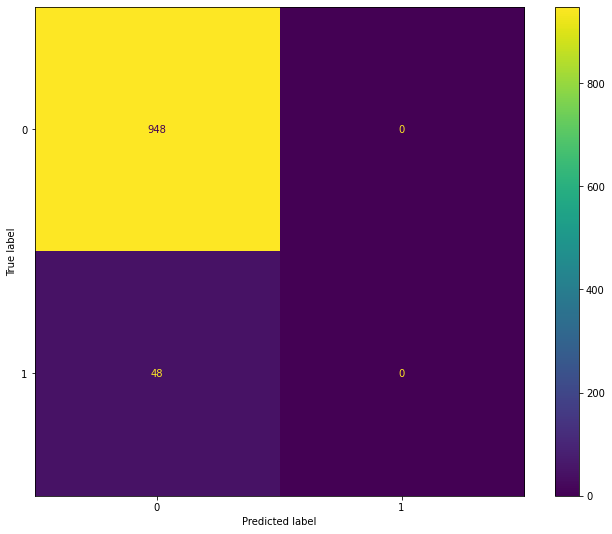

In [22]:
plt.rcParams["figure.figsize"] = (11, 9)

y_hat = model.predict(input_test)

print(f"The accuracy of this model is: {accuracy_score(label_test, y_hat.round()):.2%}")

cm = confusion_matrix(label_test, y_hat.round())
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Logistic Regression

In [23]:
model = linear_model.LogisticRegression(solver="liblinear").fit(input_train, label_train)

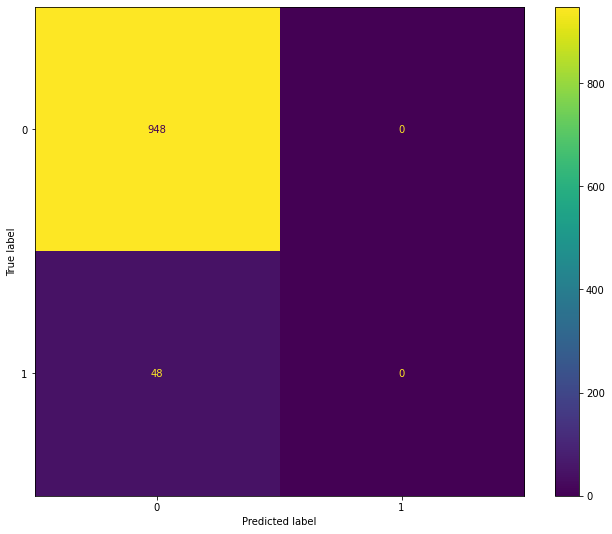

The accuracy of this model is: 95.18%


In [24]:
cm = confusion_matrix(label_test, y_hat.round())
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(f"The accuracy of this model is: {model.score(input_test, label_test):.2%}")

### Comparison

All methods reached the same accuracy score. They are the same, because in every model every sample will be classified as `employed`. It is possible that this happened, because the class `unemployed` is undersampled in the data.

### Were older employeed more probable to be unemployed after the financial crisis in 2008/2009?

In [25]:
fig = px.histogram(employment, x="age", y="unemployed", nbins=5)
fig.show()

It seems that for this data, that older people (age >= 60) had a lower chance to become unemployed.

# b)

### Read data

In [26]:
growth = pd.read_excel("dataset/Growth.xlsx")
growth.shape

/Users/lukaskubelka/Documents/_KIT/_Studium/_M.Sc./_Semester/Semester-2/PSDA/Uebungen/PSDA/.venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



(65, 8)

In [27]:
growth.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


The data set contains mainly continuous variables:
- the variables `growth`, `rgdp60`, `tradeshare`, `yearsschool`, `rev_coups` and `assassinations` are all real-valued

The variables `country_name` and `oil` are discrete:
- `county_name` is a categorical variable (irrelevant)
- `oil` is a binary variable

The target variable is `growth`

### Get familiar with data

In [28]:
growth.sort_values(by="assasinations", ascending=False).head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
28,Guatemala,0.929231,0,1659.999756,0.509590,1.42,0.540741,2.466667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
30,El Salvador,-0.607556,0,1426.999878,0.527773,1.70,0.633333,1.733333
6,Spain,2.880327,0,3123.001465,0.299406,3.80,0.066667,1.433333
11,Italy,2.932981,0,4564.000488,0.330022,4.56,0.033333,1.200000


In [29]:
growth.sort_values(by="yearsschool", ascending=False).head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
37,Denmark,2.179370,0,6759.999023,0.560750,10.07,0.0,0.000000
23,New Zealand,1.124132,0,7960.000977,0.455769,9.55,0.0,0.000000
10,Australia,1.975147,0,7782.002441,0.329479,9.03,0.0,0.066667
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.0,0.433333
21,Canada,2.385988,0,7257.997070,0.444375,8.07,0.0,0.066667


In [30]:
growth[growth["country_name"] == "Germany"]

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
20,Germany,2.453688,0,6569.998535,0.442143,7.64,0.066667,0.233333


### 1. Check if variable `oil` contains any information

In [31]:
growth["oil"].value_counts()

0    65
Name: oil, dtype: int64

All values of the variable `oil` are zero. That means it has to be dropped:

In [32]:
growth.drop(columns="oil", inplace=True)
growth.head()

,country_name,growth,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,9895.003906,0.160815,8.66,0.000000,0.433333


### 2. Drop variable `country_name`, because it is not a good predictor

In [33]:
growth.drop(columns="country_name", inplace=True)
growth.head()

,growth,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,1.915168,765.999817,0.140502,1.45,0.133333,0.866667
1,0.617645,4462.001465,0.156623,4.99,0.933333,1.933333
2,4.304759,2953.999512,0.157703,6.71,0.000000,0.200000
3,2.930097,1783.999878,0.160405,2.89,0.100000,0.100000
4,1.712265,9895.003906,0.160815,8.66,0.000000,0.433333


### Choose target variable and regressors

In [34]:
y = growth["growth"]
X = growth.drop(columns="growth")

### Plot distribution of target variable

In [35]:
fig = px.histogram(growth, x=y, nbins=10)
fig.show()

In [36]:
fig = px.scatter_matrix(X)
fig.show()

### Possible methods

Possible regression methods are:

- ridge regression
- regression tree
- knn regression

Ridge Regression will be used, because the target variable could be assumed to be normal distributed and it is generally a good idea to use a shrinkage model to prevent overfitting (likely to happen with this few training examples).

### Create training and test-split

In [37]:
input_train, input_test, target_train, target_test = train_test_split(X, y, shuffle=True, random_state=42)

### Baseline

In [38]:
avg_growth = target_train.mean()
model = lambda x: avg_growth
y_hat = input_test.apply(model, axis=1)
print(f"MSE of baseline is: {mean_squared_error(target_test, y_hat)}")

MSE of baseline is: 5.431124954587735


### Ridge Regression

Preprocessing: For ridge regression one has to standardize the features by removing the mean and scaling to unit variance.

In [39]:
input_train = StandardScaler().fit_transform(input_train)
input_test = StandardScaler().fit_transform(input_test)

In [40]:
model = linear_model.Ridge(alpha=0.1, random_state=42)
model.fit(input_train, target_train)

Ridge(alpha=0.1, random_state=42)

In [41]:
y_hat = model.predict(input_test)

print("MSE: ", mean_squared_error(target_test, y_hat))
print("R2: ", r2_score(target_test, y_hat))

MSE:  2.9758978115157113
R2:  0.355780843035295


One can see that Ridge Regression fits the data better than the baseline.
The mean squared out-of-sample error of the ridge model is roughly 45% of the baseline's mse.

Still, one can see that the used features only explain 35.57% of the target variable's variance (see R2 score).
This is probably due to the fact, that there is a strong correlation between the `yearsschool` and `rgdp60`. 

# c)

### Read data

In [42]:
crabs = pd.read_csv("dataset/crabs.txt", header=None, delim_whitespace=True, names=["id", "color", "spine", "width", "weight", "satellites"], index_col=0)
crabs.shape

(173, 5)

In [43]:
crabs.head()

,color,spine,width,weight,satellites
id,,,,,
1,2,3,28.3,3.05,8
2,3,3,26.0,2.60,4
3,3,3,25.6,2.15,0
4,4,2,21.0,1.85,0
5,2,3,29.0,3.00,1


### Get familiar with data

In [44]:
crabs.sort_values(by="satellites", ascending=False).head()

,color,spine,width,weight,satellites
id,,,,,
101,2,3,28.3,3.00,15
48,2,1,26.0,2.30,14
159,4,3,29.3,3.23,12
133,2,3,28.2,3.05,11
61,2,3,29.0,3.20,10


The variables `width` and `height` are continuous variables.

The variables `color` and `spine` are discrete, categorical variables.
These two have to be dummy-transformed.

The discrete variable `satellites` is the target.
This is a regression task, despite the target variable being discrete.
That is, because the number of possible sattelites is not fixed.

### Transform data

In [45]:
crabs = pd.get_dummies(crabs, columns=["color", "spine"], drop_first=True)
crabs.head()

,width,weight,satellites,color_2,color_3,color_4,spine_2,spine_3
id,,,,,,,,
1,28.3,3.05,8,1,0,0,0,1
2,26.0,2.60,4,0,1,0,0,1
3,25.6,2.15,0,0,1,0,0,1
4,21.0,1.85,0,0,0,1,1,0
5,29.0,3.00,1,1,0,0,0,1


### Choose target variable and inputs

In [46]:
y = crabs["satellites"]
X = crabs.drop(columns="satellites")

### Visualize target distribution

In [47]:
fig = px.histogram(crabs, x=y, nbins=10)
fig.show()

### Create train/test split

In [48]:
input_train, input_test, target_train, target_test = train_test_split(X, y, shuffle=True, random_state=42)

### Possible methods

...

### Baseline

In [49]:
model = linear_model.PoissonRegressor(alpha=0, max_iter=1000)
model.fit(input_train, target_train)

PoissonRegressor(alpha=0, max_iter=1000)

In [50]:
y_hat = model.predict(input_test)

print("MSE: ", mean_squared_error(target_test, y_hat))
print("R2: ", r2_score(target_test, y_hat))

MSE:  6.331471919972176
R2:  0.16879842428520142


### Other Method

Evaluation: ...

# d)

In [51]:
gasoline = pd.read_csv("dataset/gasoline.csv", sep=";", index_col=0, decimal=",")
gasoline.shape

(32, 6)

In [52]:
gasoline

,yield,gravity,pressure,temp10,temp,batch
1,0.122,50.8,8.6,190,205,1
2,0.223,50.8,8.6,190,275,1
3,0.347,50.8,8.6,190,345,1
4,0.457,50.8,8.6,190,407,1
5,0.080,40.8,3.5,210,218,2
6,0.131,40.8,3.5,210,273,2
7,0.266,40.8,3.5,210,347,2
8,0.074,40.0,6.1,217,212,3
9,0.182,40.0,6.1,217,272,3
10,0.304,40.0,6.1,217,340,3


The variables `yield`, `gravity` and `pressure` are continuous.

The variables `temp10` and `temp` are discrete.

The variable `batch` is a categorical variable.

In [53]:
fig = px.scatter(gasoline, y="yield", color="batch")
fig.show()

### Remove `batch` variable due to perfect correlation

In [54]:
gasoline.drop(columns="batch", inplace=True)
gasoline.head()

,yield,gravity,pressure,temp10,temp
1,0.122,50.8,8.6,190,205
2,0.223,50.8,8.6,190,275
3,0.347,50.8,8.6,190,345
4,0.457,50.8,8.6,190,407
5,0.080,40.8,3.5,210,218


## Choose target variable and inputs

In [55]:
y = gasoline["yield"]
X = gasoline.drop(columns="yield")

### Possible methods

...

### Get train test split

In [56]:
input_train, input_test, target_train, target_test = train_test_split(X, y, shuffle=True, random_state=42)

### Baseline

In [57]:
model = BetaModel(y, X).fit()

/Users/lukaskubelka/Documents/_KIT/_Studium/_M.Sc./_Semester/Semester-2/PSDA/Uebungen/PSDA/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:2694: UserWarning:

df_model + k_constant differs from nparams



In [58]:
y_hat = model.predict(input_test)

print("MSE: ", mean_squared_error(target_test, y_hat))

MSE:  0.0009687571203495709


# Präsentation

Was ist Lesson learned? Was war interessant, was war wichtig bei der Aufgabe?